In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#from sklearn.datasets import load_iris les iris de seaborn sont mieux

In [2]:
#iris=load_iris()
iris2 = sns.load_dataset("iris")

In [3]:
iris2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
#X=iris.data
#y=iris.target

In [4]:
iris2.shape

(150, 5)

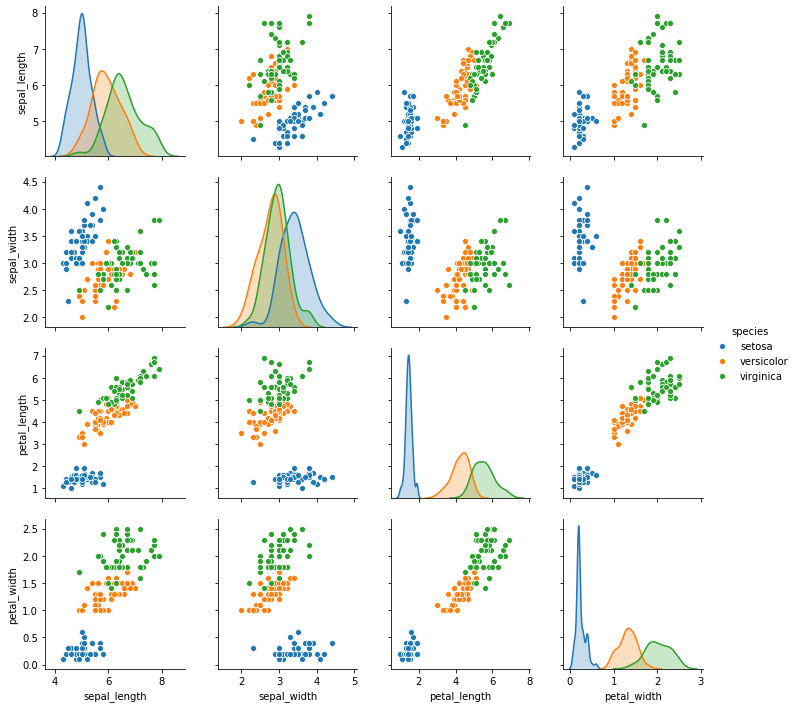

In [5]:
sns.pairplot(iris2, hue="species")

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)  #on divise en train set et test set le dataset

In [9]:
X=iris2.iloc[:,0:4]
y=iris2.iloc[:,4]

In [10]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [11]:
Xtrain

,sepal_length,sepal_width,petal_length,petal_width
82,5.8,2.7,3.9,1.2
65,6.7,3.1,4.4,1.4
62,6.0,2.2,4.0,1.0
40,5.0,3.5,1.3,0.3
60,5.0,2.0,3.5,1.0
...,...,...,...,...
102,7.1,3.0,5.9,2.1
145,6.7,3.0,5.2,2.3
84,5.4,3.0,4.5,1.5
90,5.5,2.6,4.4,1.2


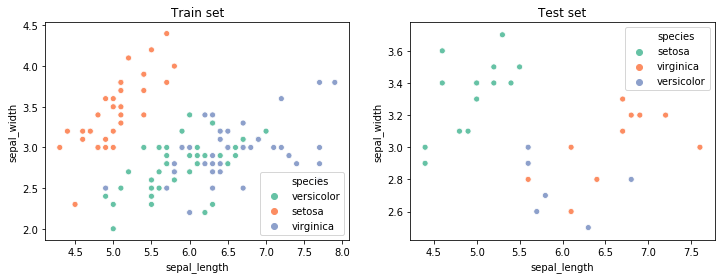

In [98]:
cmap = sns.cubehelix_palette(dark=.1, light=.8, as_cmap=True)
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.scatterplot(x=Xtrain.sepal_length, y=Xtrain.sepal_width, hue=ytrain,palette="Set2")
plt.title('Train set')
plt.subplot(122)
sns.scatterplot(x=Xtest.sepal_length, y=Xtest.sepal_width,hue=ytest,palette="Set2")
plt.title('Test set')
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier  #on importe un model ici KNN

In [14]:
model=KNeighborsClassifier(n_neighbors=1)

In [15]:
model.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
model.score(Xtrain,ytrain)

1.0

In [17]:
model.score(Xtest,ytest)

0.9666666666666667

In [18]:
from sklearn.model_selection import cross_val_score #on instaure la séquence de cross validation
#c'est à dire qu'on va diviser le train set en un train set et un validation set pour ne vraiment pas toucher au test set

In [19]:
cross_val_score(KNeighborsClassifier(5),Xtrain,ytrain,cv=5,scoring='accuracy')

array([0.96      , 1.        , 1.        , 0.95833333, 1.        ])

In [20]:
cross_val_score(KNeighborsClassifier(3),Xtrain,ytrain,cv=5,scoring='accuracy').mean()

0.9753333333333334

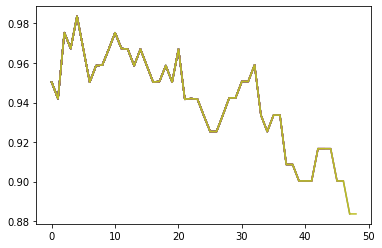

In [21]:
val_score=[]
for k in range(1,50):
    score=cross_val_score(KNeighborsClassifier(k),Xtrain,ytrain,cv=5,scoring='accuracy').mean()
    val_score.append(score)

    plt.plot(val_score)

In [22]:
#mais cette boucle est inutile car on a la validation curve qui va faire ce travail pour nous !
from sklearn.model_selection import validation_curve

In [23]:
model=KNeighborsClassifier()
k=np.arange(1,50)

train_score,val_score=validation_curve(model,Xtrain,ytrain,'n_neighbors',k,cv=5)

In [24]:
val_score.shape

(49, 5)

In [25]:
val_score.mean(axis=1)

array([0.95030435, 0.94197101, 0.97533333, 0.96733333, 0.98366667,
       0.96697101, 0.95030435, 0.95863768, 0.959     , 0.96697101,
       0.97533333, 0.96733333, 0.967     , 0.95866667, 0.967     ,
       0.95866667, 0.95033333, 0.95066667, 0.95866667, 0.95033333,
       0.967     , 0.94163768, 0.942     , 0.94163768, 0.93330435,
       0.92530435, 0.92530435, 0.93363768, 0.94233333, 0.94233333,
       0.95066667, 0.95066667, 0.959     , 0.93363768, 0.92530435,
       0.93363768, 0.93363768, 0.90863768, 0.90863768, 0.90030435,
       0.90030435, 0.90030435, 0.91663768, 0.91663768, 0.91663768,
       0.90030435, 0.90030435, 0.8836087 , 0.8836087 ])

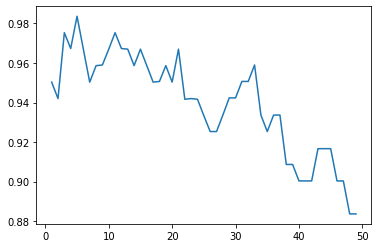

In [26]:
plt.plot(k,val_score.mean(axis=1))

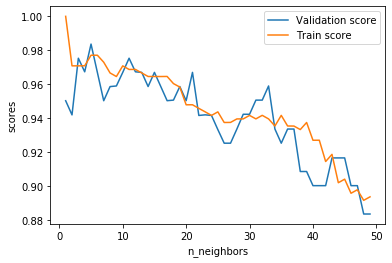

In [27]:
plt.plot(k,val_score.mean(axis=1),label='Validation score')
plt.plot(k,train_score.mean(axis=1),label='Train score')
plt.ylabel('scores')
plt.xlabel('n_neighbors')
plt.legend()

In [28]:
# mais on a testé qu'eun seul hyperparamètre, or, il en existe d'autres comme par exemple 
#la façon de mesurer, c'est ce que l'on appelle la métrique  

In [29]:
from sklearn.model_selection import GridSearchCV  #méthode de GridSearch

In [30]:
param_grid={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}  #un dictionnaire avec les hyperparam

In [31]:
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

In [32]:
grid.fit(Xtrain,ytrain)

/Users/jmb/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
grid.best_score_

0.9833333333333333

In [34]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [35]:
model=grid.best_estimator_

In [36]:
model.score(Xtest,ytest)

0.9666666666666667

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(ytest,model.predict(Xtest))

array([[14,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 10]])

In [39]:
#et si on donne plus de données, c'est mieux ? => learning_curve

In [40]:
from sklearn.model_selection import learning_curve

In [41]:
N,train_score,val_score=learning_curve(model,Xtrain,ytrain,train_sizes=np.linspace(0.1,1.0,10),cv=5)

In [42]:
N

array([ 9, 19, 28, 38, 47, 57, 66, 76, 85, 95])

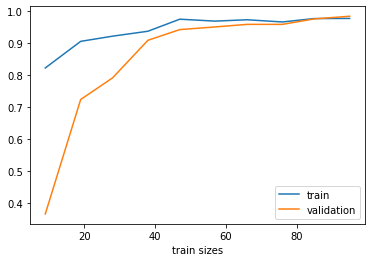

In [43]:
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train sizes')
plt.legend()


In [71]:
#les différentes techniques de cross-validation
#la première est KFold 
from sklearn.model_selection import KFold

In [72]:
cv = KFold(5)  #on indique le nombre de split
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv)

array([1.        , 0.95833333, 0.95833333, 0.95833333, 1.        ])

In [73]:
from sklearn.model_selection import LeaveOneOut  #autre méthode par LeaveOneOut 

In [74]:
cv=LeaveOneOut()
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [75]:
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv).mean()

0.9666666666666667

In [76]:
from sklearn.model_selection import ShuffleSplit  #autre méthode ShuffleSplit

In [77]:
cv=ShuffleSplit(4, test_size=0.2)  #avec le nombre de split et la proportion du set de vlaidation qui sera présent dans chaque split
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv)

array([1.        , 0.95833333, 0.95833333, 1.        ])

In [78]:
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv).mean()

0.9270833333333334

In [79]:
from sklearn.model_selection import StratifiedKFold  #autre méthode StratifiedKFold, la meilleure méthode par défaut

In [80]:
cv=StratifiedKFold(5)

In [81]:
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv)

array([0.96      , 1.        , 1.        , 0.95833333, 1.        ])

In [82]:
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv).mean()

0.9836666666666666

In [83]:
from sklearn.model_selection import GroupKFold  #si on a des dataset avec des données qui dépendent les unes des autres

In [84]:
cv=GroupKFold(5).get_n_splits(Xtrain,ytrain,groups=X.iloc[:,0])

In [85]:
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv)

array([0.96      , 1.        , 1.        , 0.95833333, 1.        ])

In [86]:
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv).mean()

0.9836666666666666

In [87]:
from sklearn.model_selection import GroupShuffleSplit
cv=GroupShuffleSplit(5).get_n_splits(Xtrain,ytrain,groups=X.iloc[:,1])

In [88]:
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv)

array([0.96      , 1.        , 1.        , 0.95833333, 1.        ])

In [89]:
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv).mean()

0.9836666666666666